In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from Model import WrightFisherModel

# Without Mutation

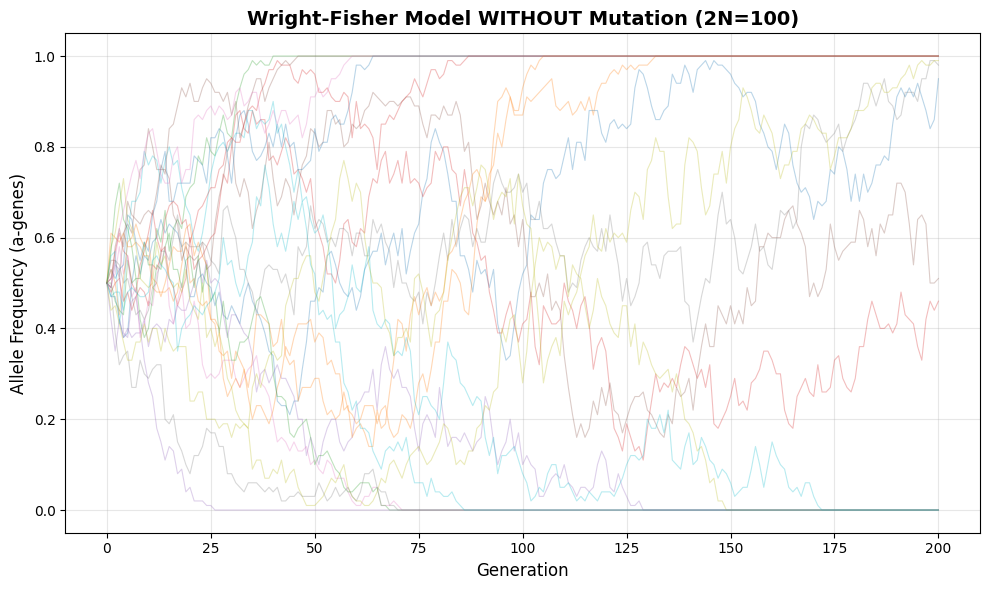

In [3]:
wf_no_mut = WrightFisherModel(population_size=100)
trajectories_no_mut = wf_no_mut.simulate_multiple(
    initial_a_genes=50, 
    generations=200, 
    n_simulations=20
)

title = "Wright-Fisher Model WITHOUT Mutation (2N=100)"


plt.figure(figsize=(10, 6))
for i, traj in enumerate(trajectories_no_mut):
    plt.plot(traj / wf_no_mut.N, alpha=0.3, linewidth=0.8)

plt.xlabel('Generation', fontsize=12)
plt.ylabel('Allele Frequency (a-genes)', fontsize=12)
plt.title(title, fontsize=14, fontweight='bold')
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# With Mutation

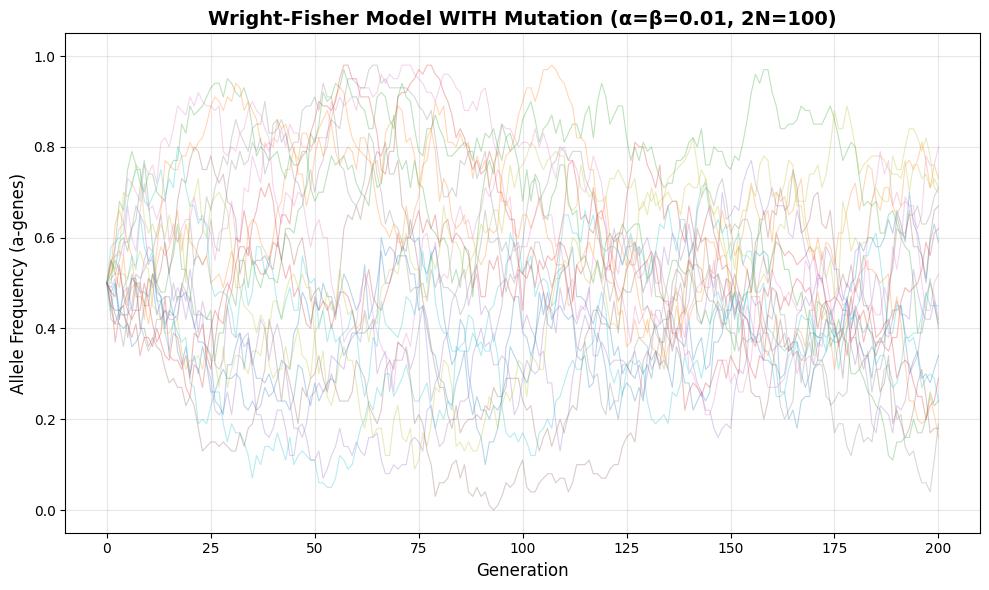

In [4]:
wf_with_mut = WrightFisherModel(population_size=100, alpha=0.01, beta=0.01)
trajectories_with_mut = wf_with_mut.simulate_multiple(
    initial_a_genes=50, 
    generations=200, 
    n_simulations=20
)

title = "Wright-Fisher Model WITH Mutation (α=β=0.01, 2N=100)"

plt.figure(figsize=(10, 6))
for i, traj in enumerate(trajectories_with_mut):
    plt.plot(traj / wf_with_mut.N, alpha=0.3, linewidth=0.8)

plt.xlabel('Generation', fontsize=12)
plt.ylabel('Allele Frequency (a-genes)', fontsize=12)
plt.title(title, fontsize=14, fontweight='bold')
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Steady-state distribution for LARGE population

In [ ]:
wf_large = WrightFisherModel(population_size=500, alpha=0.005, beta=0.005)
frequencies = wf_large.get_steady_state_distribution(
    n_simulations=5000, 
    generations=1000
)

allele_counts = np.arange(len(frequencies))

plt.figure(figsize=(10, 6))
plt.bar(allele_counts, frequencies, alpha=0.7, label='Simulated')

# Compare with Poisson if requested
mean_alleles = np.sum(allele_counts * frequencies)
if wf_large.N > 100:  # For large populations
    poisson_probs = poisson.pmf(allele_counts, mean_alleles)
    plt.plot(allele_counts, poisson_probs, 'r--', linewidth=2, 
            label=f'Poisson(λ={mean_alleles:.1f})')

plt.xlabel('Number of a-genes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title(title, fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()